In [65]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

# Boyer-Moore String Search Algorithm

In [66]:
NO_OF_CHARS = 256

def badCharHeuristic(string, size):
	badChar = [-1]*NO_OF_CHARS

	for i in range(size):
		badChar[ord(string[i])] = i;

	return badChar

@timer_func
def boyer_moore_search(txt, pat):

	patternFound = []

	m = len(pat)
	n = len(txt)

	badChar = badCharHeuristic(pat, m)

	s = 0
	while(s <= n-m):
		j = m-1

		while j>=0 and pat[j] == txt[s+j]:
			j -= 1

		if j<0:
			#print("Pattern occur at shift = {}".format(s))
			patternFound.append(s)
			s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
		else:
			s += max(1, j-badChar[ord(txt[s+j])])


	return patternFound

### LETS WRITE A SIMPLE TEST CASE

In [67]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()

In [68]:
a  = boyer_moore_search(data,"aliquam")

In [69]:
len(a[0])

3181

### Runtime For Boyer-Moore

In [70]:
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

In [71]:
search = []
runtime = []
for i in wordSearchList:
	print('Searching for: ',i)
	search = boyer_moore_search(data,i)
	runtime.append(search[1])

Searching for:  dui
Searching for:  aliquam
Searching for:  habitant
Searching for:  neque
Searching for:  nunc
Searching for:  commodo
Searching for:  libero
Searching for:  nulla
Searching for:  sapien
Searching for:  suscipit
Searching for:  viverra
Searching for:  mauris
Searching for:  nibh
Searching for:  nisi
Searching for:  nisl
Searching for:  nunc
Searching for:  odio
Searching for:  orci
Searching for:  ornare
Searching for:  pellentesque
Searching for:  pharetra
Searching for:  placerat
Searching for:  porta
Searching for:  porttitor
Searching for:  posuere
Searching for:  potenti
Searching for:  praesent
Searching for:  pretium
Searching for:  proin
Searching for:  pulvinar
Searching for:  purus
Searching for:  quam
Searching for:  quis
Searching for:  quisque
Searching for:  rhoncus
Searching for:  risus
Searching for:  rutrum
Searching for:  sagittis
Searching for:  sapien
Searching for:  scelerisque
Searching for:  sed
Searching for:  sem
Searching for:  semper
Searchin

In [72]:
print(runtime)

[2246897827840.0, 1192398946304.0, 717899169792.0, 848321576960.0, 616471986176.0, 311719100416.0, 280003608576.0, 306996051968.0, 298521460736.0, 250156941312.0, 270946009088.0, 287905677312.0, 412053929984.0, 367633104896.0, 386365128704.0, 354594062336.0, 378867286016.0, 359122337792.0, 259545104384.0, 167341719552.0, 211764903936.0, 247987961856.0, 333914046464.0, 207478849536.0, 222524080128.0, 260839047168.0, 237010944000.0, 273688821760.0, 332548014080.0, 228352065536.0, 324470046720.0, 394290003968.0, 439082024960.0, 241020698624.0, 227024830464.0, 312446025728.0, 238983839744.0, 224224870400.0, 264120041472.0, 200745943040.0, 511357747200.0, 519354974208.0, 261055840256.0, 241451925504.0, 540556656640.0, 266868883456.0, 238091763712.0, 254111907840.0, 181629091840.0, 212255113216.0, 147565838336.0, 274713280512.0, 288855949312.0, 276290076672.0, 305847074816.0, 172113788928.0, 258581725184.0, 294341836800.0, 339830636544.0, 361278996480.0, 178715361280.0, 237954662400.0, 19727

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,2.246898e+12
1,1.192399e+12
2,7.178992e+11
3,8.483216e+11
4,6.164720e+11
...,...
71,3.607170e+11
72,2.449468e+11
73,2.339079e+11
74,2.867281e+11


<AxesSubplot: >

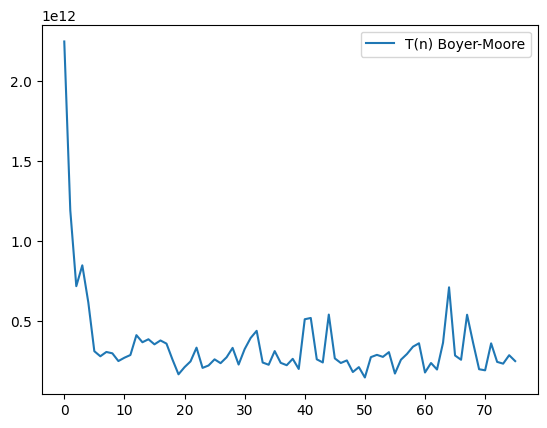

In [74]:
df.plot(y='T(n) Boyer-Moore')